# Predicting Hourly Bike Rentals in Washington, D.C.

### Data Source: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

In [2]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72C7-C701

 Directory of C:\Users\Ryan.nsj\Desktop\Python Notebooks\DataQuest Code Snippets\Guided Project Predicting Bike Rentals

14/01/2019  01:06 PM    <DIR>          .
14/01/2019  01:06 PM    <DIR>          ..
14/01/2019  10:43 AM    <DIR>          .ipynb_checkpoints
20/12/2013  12:10 PM            57,569 day.csv
20/12/2013  12:10 PM         1,156,736 hour.csv
14/01/2019  01:06 PM           167,645 Predicting Hourly Bike Rentals in Washington, D.C..ipynb
20/12/2013  01:29 PM             5,607 Readme.txt
14/01/2019  12:58 PM            83,853 tree.dot
               5 File(s)      1,471,410 bytes
               3 Dir(s)  25,060,179,968 bytes free


In [3]:
bike_rentals = pd.read_csv("hour.csv")

### Dataset Introduction
This dataset details the count of bicylces rented out during hourly time windows (24 instances per day), and includes the date, time, type of day, environmental conditions and rider types.

In [4]:
bike_rentals.head(48)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
bike_rentals["cnt"].mode()

0    5
dtype: int64

In [6]:
bike_rentals["cnt"].value_counts().sort_index()

1      158
2      208
3      224
4      231
5      260
6      236
7      198
8      182
9      128
10     155
11     147
12     122
13     113
14      97
15      89
16     105
17     102
18      79
19      69
20      91
21      90
22      64
23      81
24      76
25      72
26      90
27      71
28      85
29      64
30      67
      ... 
886      2
887      1
888      1
890      1
891      2
892      1
893      1
894      1
897      1
898      1
899      1
900      3
901      1
905      1
913      1
917      1
922      1
925      1
938      1
941      1
943      1
948      1
953      1
957      1
963      1
967      1
968      1
970      1
976      1
977      1
Name: cnt, Length: 869, dtype: int64

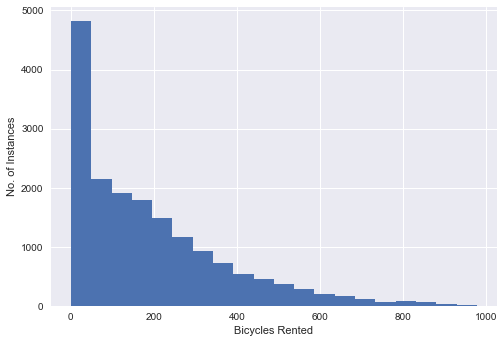

In [7]:
plt.hist(bike_rentals["cnt"], bins=20)
plt.xlabel("Bicycles Rented")
plt.ylabel("No. of Instances")

The histogram roughly indicates an exponetial distribution, an expected outcome since number of bikes rented in an hour is likely a Poisson random variable.

#### Value Counts Findings
* Most commonly (mode), 5 bikes are rented each hour.  
* The least number of bikes rented is 1, meaning that not a single hour passes where 0 bikes are rented.  
* The highest number of bikes rented is 977.

In [8]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


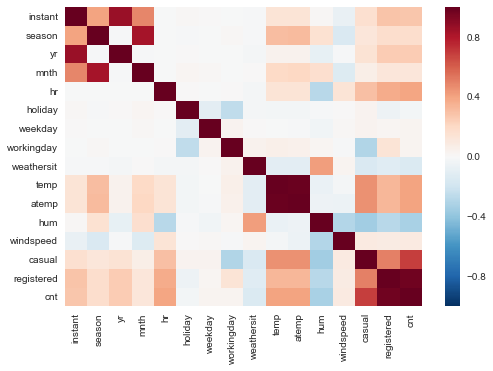

In [9]:
sns.heatmap(bike_rentals.corr())

#### Correleation Plot Findings
* Naturally, `cnt` is closely correlated to `casual` and `registered` since their summation gives `cnt`
* `cnt` is correlated to `atemp` and `temp`, meaning that the hotter the weather, the more bikes are rented.
* `cnt` is negatively correlated to `hum`, meaning that the lower humidity, the more bikes are rented.
* `cnt` is correlated to `hr`, which could mean that typically, more bikes are rented later in the day. Looking further:

([<matplotlib.axis.XTick at 0x1b19a377358>,
 <a list of 24 Text xticklabel objects>)

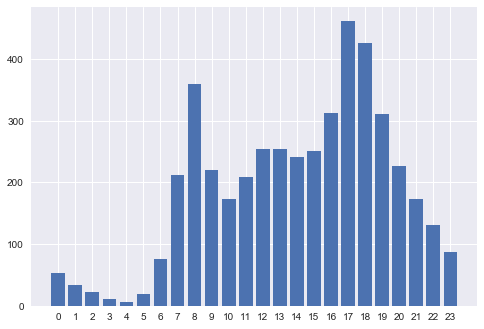

In [10]:
avg_rentals_each_hour = []
for hour in range(24):
    hour_rentals = bike_rentals[bike_rentals['hr']==hour]
    avg_rentals = hour_rentals['cnt'].mean()
    avg_rentals_each_hour.append(avg_rentals)

plt.bar(left=range(24), height=avg_rentals_each_hour)
plt.xticks(range(24))

Plotting the average rentals for each hour, we can see that the peak periods for bike rentals are at 7AM and 5-6PM. Probably for cyling to and from the workplace.

### Objective: Build a ML model that predicts the number of bicycles rented out for a given hour

### Feature Processing and Engineering

* `hr`: Batch instances into 1 of 4 categories, early morning, morning, afternoon and night. This will bundle similar times together, enabling the model to make better decisions.

In [11]:
bike_rentals['time_labels']=0
bike_rentals.loc[(bike_rentals['hr']>=6)&(bike_rentals['hr']<12),'time_labels'] = 1
bike_rentals.loc[(bike_rentals['hr']>=12)&(bike_rentals['hr']<18),'time_labels'] = 2
bike_rentals.loc[(bike_rentals['hr']>=18)&(bike_rentals['hr']<24),'time_labels'] = 3
bike_rentals.loc[(bike_rentals['hr']>=0)&(bike_rentals['hr']<6),'time_labels'] = 4

In [12]:
bike_rentals.head(48)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_labels
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


#### Error Metric: RMSE
Since this is a regression problem, Root Mean Squared Error will be used for the Error Metric

In [13]:
# Splitting the Data Set
train = bike_rentals.sample(frac=0.8, random_state=1)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

print(bike_rentals.shape)
print(train.shape)
print(test.shape)

(17379, 18)
(13903, 18)
(3476, 18)


In [14]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_labels'],
      dtype='object')

In [15]:
predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")
target = 'cnt'

X_train, X_test = train[predictors], test[predictors]
y_train, y_test = train[target], test[target]

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Run LR model against train and test set
lr_model_train_pred = lr_model.predict(X_train)
lr_model_test_pred = lr_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_model_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_model_test_pred))
lr_train_r2 = r2_score(y_train, lr_model_train_pred)
lr_test_r2 = r2_score(y_test, lr_model_test_pred)

print("Train RMSE:", lr_train_rmse)
print("Test RMSE:", lr_test_rmse)
print("Train RSquare:", lr_train_r2)
print("Test RSquare:", lr_test_r2)

Train RMSE: 132.607493834
Test RMSE: 130.583784871
Train RSquare: 0.470254668335
Test RSquare: 0.462203635682


#### Linear Regression Model Findings
* Closeness of RMSE in the train and test set indicate that the model is not overfitted
* High RMSE error value indicates that the model is likely underfitted to the data.
* Low R^2 Score indicates a poor fit.

## Decision Tree

##### min_samples_leaf = 2

In [17]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(min_samples_leaf=2)
dt_model.fit(X_train,y_train)

# Run dt model against train and test set
dt_model_train_pred = dt_model.predict(X_train)
dt_model_test_pred = dt_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_model_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_model_test_pred))
dt_train_r2 = r2_score(y_train, dt_model_train_pred)
dt_test_r2 = r2_score(y_test, dt_model_test_pred)

print("Train RMSE:", dt_train_rmse)
print("Test RMSE:", dt_test_rmse)
print("Train RSquare:", dt_train_r2)
print("Test RSquare:", dt_test_r2)

Train RMSE: 17.1580422896
Test RMSE: 54.1578698856
Train RSquare: 0.99113116712
Test RSquare: 0.907495575269


##### min_samples_leaf = 5

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(min_samples_leaf=5)
dt_model.fit(X_train,y_train)

# Run dt model against train and test set
dt_model_train_pred = dt_model.predict(X_train)
dt_model_test_pred = dt_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_model_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_model_test_pred))
dt_train_r2 = r2_score(y_train, dt_model_train_pred)
dt_test_r2 = r2_score(y_test, dt_model_test_pred)

print("Train RMSE:", dt_train_rmse)
print("Test RMSE:", dt_test_rmse)
print("Train RSquare:", dt_train_r2)
print("Test RSquare:", dt_test_r2)

Train RMSE: 31.6585830579
Test RMSE: 52.3691539698
Train RSquare: 0.969806465856
Test RSquare: 0.913505105481


##### min_samples_leaf = 10

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(min_samples_leaf=10)
dt_model.fit(X_train,y_train)

# Run dt model against train and test set
dt_model_train_pred = dt_model.predict(X_train)
dt_model_test_pred = dt_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_model_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_model_test_pred))
dt_train_r2 = r2_score(y_train, dt_model_train_pred)
dt_test_r2 = r2_score(y_test, dt_model_test_pred)

print("Train RMSE:", dt_train_rmse)
print("Test RMSE:", dt_test_rmse)
print("Train RSquare:", dt_train_r2)
print("Test RSquare:", dt_test_r2)

Train RMSE: 40.2338856829
Test RMSE: 51.9814585156
Train RSquare: 0.951234244289
Test RSquare: 0.914781030252


##### min_samples_leaf = 10, max_depth=10

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(min_samples_leaf=10, max_depth=10)
dt_model.fit(X_train,y_train)

# Run dt model against train and test set
dt_model_train_pred = dt_model.predict(X_train)
dt_model_test_pred = dt_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_model_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_model_test_pred))
dt_train_r2 = r2_score(y_train, dt_model_train_pred)
dt_test_r2 = r2_score(y_test, dt_model_test_pred)

print("Train RMSE:", dt_train_rmse)
print("Test RMSE:", dt_test_rmse)
print("Train RSquare:", dt_train_r2)
print("Test RSquare:", dt_test_r2)

Train RMSE: 51.0425002032
Test RMSE: 58.8031562644
Train RSquare: 0.921513514611
Test RSquare: 0.890946242845


## Random Forest

##### n_estimators=10, min_samples_leaf=1, max_depth=None

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10, min_samples_leaf=1, max_depth=None)
rf_model.fit(X_train,y_train)

# Run rf model against train and test set
rf_model_train_pred = rf_model.predict(X_train)
rf_model_test_pred = rf_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_model_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_model_test_pred))
rf_train_r2 = r2_score(y_train, rf_model_train_pred)
rf_test_r2 = r2_score(y_test, rf_model_test_pred)

print("Train RMSE:", rf_train_rmse)
print("Test RMSE:", rf_test_rmse)
print("Train RSquare:", rf_train_r2)
print("Test RSquare:", rf_test_r2)

Train RMSE: 18.2834760747
Test RMSE: 43.6158864017
Train RSquare: 0.989929557847
Test RSquare: 0.940003106571


##### n_estimators=150, min_samples_leaf=5, max_depth=None

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=150, min_samples_leaf=5, max_depth=None, n_jobs=-1)
rf_model.fit(X_train,y_train)

# Run rf model against train and test set
rf_model_train_pred = rf_model.predict(X_train)
rf_model_test_pred = rf_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_model_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_model_test_pred))
rf_train_r2 = r2_score(y_train, rf_model_train_pred)
rf_test_r2 = r2_score(y_test, rf_model_test_pred)

print("Train RMSE:", rf_train_rmse)
print("Test RMSE:", rf_test_rmse)
print("Train RSquare:", rf_train_r2)
print("Test RSquare:", rf_test_r2)

Train RMSE: 31.1227972016
Test RMSE: 44.872578068
Train RSquare: 0.970819801007
Test RSquare: 0.936495953254


##### n_estimators=150, min_samples_leaf=10, max_depth=10

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=150, min_samples_leaf=10, max_depth=10, n_jobs=-1)
rf_model.fit(X_train,y_train)

# Run rf model against train and test set
rf_model_train_pred = rf_model.predict(X_train)
rf_model_test_pred = rf_model.predict(X_test)

# Calculate RMSE and R2 in both train and test set to detect overfitting
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_model_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_model_test_pred))
rf_train_r2 = r2_score(y_train, rf_model_train_pred)
rf_test_r2 = r2_score(y_test, rf_model_test_pred)

print("Train RMSE:", rf_train_rmse)
print("Test RMSE:", rf_test_rmse)
print("Train RSquare:", rf_train_r2)
print("Test RSquare:", rf_test_r2)

Train RMSE: 45.7346085149
Test RMSE: 53.2452474278
Train RSquare: 0.936988337915
Test RSquare: 0.910586919701


## Conclusion

* Random Forest Regressor model performs the best, with a relatively low RMSE and high R2 score as compared to Linear Regression and Decision Trees